Performing forward pass on the model...
Capturing feature map from conv1 layer...
Capturing feature map from conv2 layer...
Displaying feature maps for conv1...
Plotting feature maps from layer conv1...
Feature map shape for conv1: torch.Size([1, 16, 128, 128]) (batch_size, num_filters, height, width)


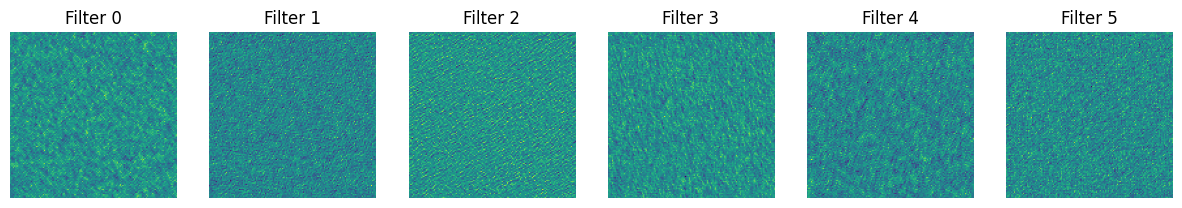

Displaying feature maps for conv2...
Plotting feature maps from layer conv2...
Feature map shape for conv2: torch.Size([1, 16, 128, 128]) (batch_size, num_filters, height, width)


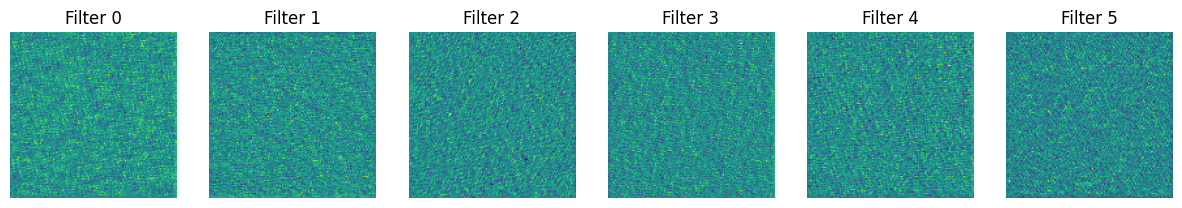

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import CNN_classifier  # Make sure this is correct

# Load the trained model
n_classes = 37  # Change according to your setup
model = CNN_classifier(n_classes)
model.load_state_dict(torch.load("/teamspace/studios/this_studio/model_cnn.pth", map_location=torch.device('cpu')))
model.eval()

# Hook function to capture feature maps
feature_maps = {}

def hook_fn_conv1(module, input, output):
    """
    Hook function to capture the output of the first convolutional layer (conv1).
    """
    print("Capturing feature map from conv1 layer...")
    feature_maps["conv1"] = output.detach()  # Detach the output from the computation graph

def hook_fn_conv2(module, input, output):
    """
    Hook function to capture the output of the second convolutional layer (conv2).
    """
    print("Capturing feature map from conv2 layer...")
    feature_maps["conv2"] = output.detach()  # Detach the output from the computation graph

# Register the hook to capture feature maps after the layers
model.conv1.register_forward_hook(hook_fn_conv1)
model.conv2.register_forward_hook(hook_fn_conv2)

# Example input tensor (replace with actual image preprocessing)
input_tensor = torch.randn(1, 3, 128, 128)  # Batch size of 1, 3 channels (RGB), 128x128 image

print("Performing forward pass on the model...")
# Forward pass (this will trigger the hooks and capture feature maps)
_ = model(input_tensor)

# Function to plot feature maps
def plot_feature_maps(feature_maps, layer_name):
    """
    Function to plot the feature maps of a given layer.
    """
    print(f"Plotting feature maps from layer {layer_name}...")
    activation = feature_maps[layer_name]  # Get feature map for the selected layer
    num_filters = activation.shape[1]  # Number of channels in the feature map (filters)

    # Print the shape of the activation tensor to understand its structure
    print(f"Feature map shape for {layer_name}: {activation.shape} (batch_size, num_filters, height, width)")

    # Create a figure with subplots to show the feature maps
    fig, axes = plt.subplots(1, min(6, num_filters), figsize=(15, 5))  # Show up to 6 feature maps
    for i in range(min(6, num_filters)):
        ax = axes[i]
        ax.imshow(activation[0, i].cpu().numpy(), cmap="viridis")  # Convert tensor to numpy array for plotting
        ax.axis("off")  # Hide axes
        ax.set_title(f"Filter {i}")

    plt.show()

# Call the plot function for conv1 and conv2 feature maps
if "conv1" in feature_maps:
    print("Displaying feature maps for conv1...")
    plot_feature_maps(feature_maps, "conv1")

if "conv2" in feature_maps:
    print("Displaying feature maps for conv2...")
    plot_feature_maps(feature_maps, "conv2")
